# 1. importation de librairies 


In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
import warnings
warnings.filterwarnings('ignore')

# 2. chargement des donnees 

In [2]:
data=pd.read_csv('Data/Darknet_2.csv')
data.head()

,Flow ID,Src IP,Src Port,Dst IP,Dst Port,Protocol,Timestamp,Flow Duration,Total Fwd Packet,Total Bwd packets,...,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label,Label.1
0,10.152.152.11-216.58.220.99-57158-443-6,10.152.152.11,57158,216.58.220.99,443,6,7/24/2015 16:09,229,1,1,...,0,0,0,0,0.000000e+00,0.000,0.000000e+00,0.000000e+00,Non-Tor,AUDIO-STREAMING
1,10.152.152.11-216.58.220.99-57159-443-6,10.152.152.11,57159,216.58.220.99,443,6,7/24/2015 16:09,407,1,1,...,0,0,0,0,0.000000e+00,0.000,0.000000e+00,0.000000e+00,Non-Tor,AUDIO-STREAMING
2,10.152.152.11-216.58.220.99-57160-443-6,10.152.152.11,57160,216.58.220.99,443,6,7/24/2015 16:09,431,1,1,...,0,0,0,0,0.000000e+00,0.000,0.000000e+00,0.000000e+00,Non-Tor,AUDIO-STREAMING
3,10.152.152.11-74.125.136.120-49134-443-6,10.152.152.11,49134,74.125.136.120,443,6,7/24/2015 16:09,359,1,1,...,0,0,0,0,0.000000e+00,0.000,0.000000e+00,0.000000e+00,Non-Tor,AUDIO-STREAMING
4,10.152.152.11-173.194.65.127-34697-19305-6,10.152.152.11,34697,173.194.65.127,19305,6,7/24/2015 16:09,10778451,591,400,...,0,0,0,0,1.437760e+15,3117718.131,1.437760e+15,1.437760e+15,Non-Tor,AUDIO-STREAMING


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 141530 entries, 0 to 141529
Data columns (total 85 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Flow ID                     141530 non-null  object 
 1   Src IP                      141530 non-null  object 
 2   Src Port                    141530 non-null  int64  
 3   Dst IP                      141530 non-null  object 
 4   Dst Port                    141530 non-null  int64  
 5   Protocol                    141530 non-null  int64  
 6   Timestamp                   141530 non-null  object 
 7   Flow Duration               141530 non-null  int64  
 8   Total Fwd Packet            141530 non-null  int64  
 9   Total Bwd packets           141530 non-null  int64  
 10  Total Length of Fwd Packet  141530 non-null  int64  
 11  Total Length of Bwd Packet  141530 non-null  int64  
 12  Fwd Packet Length Max       141530 non-null  int64  
 13  Fwd Packet Len

In [4]:
data['Label'].unique() 

array(['Non-Tor', 'NonVPN', 'Tor', 'VPN'], dtype=object)

In [5]:
data['Label.1'].unique()

array(['AUDIO-STREAMING', 'Browsing', 'Chat', 'Email', 'File-Transfer',
       'File-transfer', 'P2P', 'Video-Streaming', 'Audio-Streaming',
       'Video-streaming', 'VOIP'], dtype=object)

In [6]:
data=data[data['Label.1'].isin([ 'Chat', 'Email'])]

In [7]:
data['Label.1'].unique()

array(['Chat', 'Email'], dtype=object)

In [8]:
encorder=LabelEncoder()

In [9]:
data.isnull().sum()

Flow ID     0
Src IP      0
Src Port    0
Dst IP      0
Dst Port    0
           ..
Idle Std    0
Idle Max    0
Idle Min    0
Label       0
Label.1     0
Length: 85, dtype: int64

<Axes: >

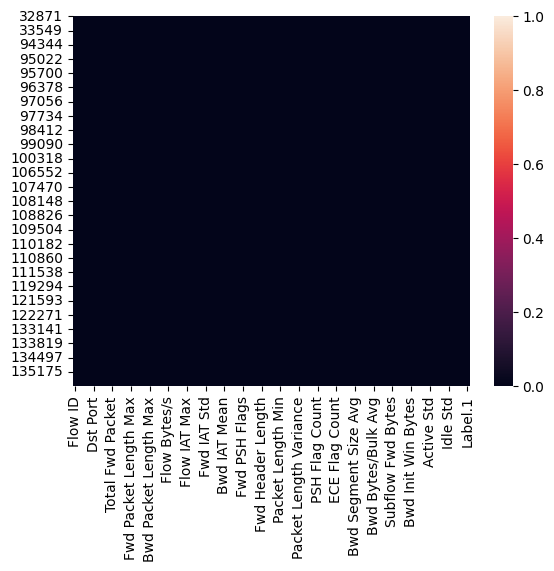

In [10]:
sns.heatmap(data.isnull())

In [11]:
data

,Flow ID,Src IP,Src Port,Dst IP,Dst Port,Protocol,Timestamp,Flow Duration,Total Fwd Packet,Total Bwd packets,...,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label,Label.1
32871,5.9.28.6-10.152.152.11-5222-56297-6,5.9.28.6,5222,10.152.152.11,56297,6,7/22/2015 14:25,60320002,5,3,...,0,0,0,0,1.437590e+15,32799072.00,1.437590e+15,1.437590e+15,Non-Tor,Chat
32872,8.6.0.1-8.0.6.4-0-0-0,8.6.0.1,0,8.0.6.4,0,0,7/22/2015 14:25,100709850,6,0,...,0,0,0,0,1.437590e+15,41488607.75,1.437590e+15,1.437590e+15,Non-Tor,Chat
32873,5.9.28.6-10.152.152.11-5222-56297-6,5.9.28.6,5222,10.152.152.11,56297,6,7/22/2015 14:15,116498878,12,12,...,0,0,0,0,1.437590e+15,34540910.21,1.437590e+15,1.437590e+15,Non-Tor,Chat
32874,8.6.0.1-8.0.6.4-0-0-0,8.6.0.1,0,8.0.6.4,0,0,7/22/2015 14:15,93296196,6,0,...,0,0,0,0,1.437590e+15,46647152.02,1.437590e+15,1.437590e+15,Non-Tor,Chat
32875,5.9.28.6-10.152.152.11-5222-56297-6,5.9.28.6,5222,10.152.152.11,56297,6,7/22/2015 14:17,91832679,14,14,...,0,0,0,0,1.437590e+15,30675072.24,1.437590e+15,1.437590e+15,Non-Tor,Chat
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
137728,10.8.8.130-2.30.116.54-48835-58139-6,10.8.8.130,48835,2.30.116.54,58139,6,3/6/2015 14:43,119993616,141,135,...,0,0,0,0,1.433350e+15,31115161.56,1.433350e+15,1.433350e+15,VPN,Chat
137729,10.8.8.130-64.4.23.162-51146-40019-6,10.8.8.130,51146,64.4.23.162,40019,6,3/6/2015 14:44,96169535,8,7,...,0,0,0,0,1.433350e+15,43838784.60,1.433350e+15,1.433350e+15,VPN,Chat
137730,10.8.8.130-157.56.192.53-33104-443-6,10.8.8.130,33104,157.56.192.53,443,6,3/6/2015 14:45,117713667,71,65,...,0,0,0,0,1.433350e+15,38034003.64,1.433350e+15,1.433350e+15,VPN,Chat
137731,86.4.212.228-10.8.8.130-59222-59320-6,86.4.212.228,59222,10.8.8.130,59320,6,3/6/2015 14:45,119998047,79,72,...,0,0,0,0,1.433350e+15,33275429.40,1.433350e+15,1.433350e+15,VPN,Chat


In [12]:
data.columns

Index(['Flow ID', 'Src IP', 'Src Port', 'Dst IP', 'Dst Port', 'Protocol',
       'Timestamp', 'Flow Duration', 'Total Fwd Packet', 'Total Bwd packets',
       'Total Length of Fwd Packet', 'Total Length of Bwd Packet',
       'Fwd Packet Length Max', 'Fwd Packet Length Min',
       'Fwd Packet Length Mean', 'Fwd Packet Length Std',
       'Bwd Packet Length Max', 'Bwd Packet Length Min',
       'Bwd Packet Length Mean', 'Bwd Packet Length Std', 'Flow Bytes/s',
       'Flow Packets/s', 'Flow IAT Mean', 'Flow IAT Std', 'Flow IAT Max',
       'Flow IAT Min', 'Fwd IAT Total', 'Fwd IAT Mean', 'Fwd IAT Std',
       'Fwd IAT Max', 'Fwd IAT Min', 'Bwd IAT Total', 'Bwd IAT Mean',
       'Bwd IAT Std', 'Bwd IAT Max', 'Bwd IAT Min', 'Fwd PSH Flags',
       'Bwd PSH Flags', 'Fwd URG Flags', 'Bwd URG Flags', 'Fwd Header Length',
       'Bwd Header Length', 'Fwd Packets/s', 'Bwd Packets/s',
       'Packet Length Min', 'Packet Length Max', 'Packet Length Mean',
       'Packet Length Std', 'Packet Len

In [13]:
x= data.iloc[ : , :-1]
y=data.iloc[ :, -1]


In [14]:
x

,Flow ID,Src IP,Src Port,Dst IP,Dst Port,Protocol,Timestamp,Flow Duration,Total Fwd Packet,Total Bwd packets,...,Fwd Seg Size Min,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
32871,5.9.28.6-10.152.152.11-5222-56297-6,5.9.28.6,5222,10.152.152.11,56297,6,7/22/2015 14:25,60320002,5,3,...,20,0,0,0,0,1.437590e+15,32799072.00,1.437590e+15,1.437590e+15,Non-Tor
32872,8.6.0.1-8.0.6.4-0-0-0,8.6.0.1,0,8.0.6.4,0,0,7/22/2015 14:25,100709850,6,0,...,0,0,0,0,0,1.437590e+15,41488607.75,1.437590e+15,1.437590e+15,Non-Tor
32873,5.9.28.6-10.152.152.11-5222-56297-6,5.9.28.6,5222,10.152.152.11,56297,6,7/22/2015 14:15,116498878,12,12,...,20,0,0,0,0,1.437590e+15,34540910.21,1.437590e+15,1.437590e+15,Non-Tor
32874,8.6.0.1-8.0.6.4-0-0-0,8.6.0.1,0,8.0.6.4,0,0,7/22/2015 14:15,93296196,6,0,...,0,0,0,0,0,1.437590e+15,46647152.02,1.437590e+15,1.437590e+15,Non-Tor
32875,5.9.28.6-10.152.152.11-5222-56297-6,5.9.28.6,5222,10.152.152.11,56297,6,7/22/2015 14:17,91832679,14,14,...,20,0,0,0,0,1.437590e+15,30675072.24,1.437590e+15,1.437590e+15,Non-Tor
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
137728,10.8.8.130-2.30.116.54-48835-58139-6,10.8.8.130,48835,2.30.116.54,58139,6,3/6/2015 14:43,119993616,141,135,...,32,0,0,0,0,1.433350e+15,31115161.56,1.433350e+15,1.433350e+15,VPN
137729,10.8.8.130-64.4.23.162-51146-40019-6,10.8.8.130,51146,64.4.23.162,40019,6,3/6/2015 14:44,96169535,8,7,...,32,0,0,0,0,1.433350e+15,43838784.60,1.433350e+15,1.433350e+15,VPN
137730,10.8.8.130-157.56.192.53-33104-443-6,10.8.8.130,33104,157.56.192.53,443,6,3/6/2015 14:45,117713667,71,65,...,32,0,0,0,0,1.433350e+15,38034003.64,1.433350e+15,1.433350e+15,VPN
137731,86.4.212.228-10.8.8.130-59222-59320-6,86.4.212.228,59222,10.8.8.130,59320,6,3/6/2015 14:45,119998047,79,72,...,20,0,0,0,0,1.433350e+15,33275429.40,1.433350e+15,1.433350e+15,VPN


In [15]:
y

32871     Chat
32872     Chat
32873     Chat
32874     Chat
32875     Chat
          ... 
137728    Chat
137729    Chat
137730    Chat
137731    Chat
137732    Chat
Name: Label.1, Length: 17623, dtype: object

In [16]:
encoder= LabelEncoder()
data['Flow ID']=encoder.fit_transform(data['Flow ID'])
data['Src IP']=encoder.fit_transform(data['Src IP'])
data['Dst IP']=encoder.fit_transform(data['Dst IP'])
data['Timestamp']=encoder.fit_transform(data['Timestamp'])
data['Label']=encoder.fit_transform(data['Label'])
data['Label.1']=encoder.fit_transform(data['Label.1'])
data['Label.1'].unique()

array([0, 1])

In [17]:
x= data.iloc[ : , :-1]
y=data.iloc[ :, -1]

In [18]:
x


,Flow ID,Src IP,Src Port,Dst IP,Dst Port,Protocol,Timestamp,Flow Duration,Total Fwd Packet,Total Bwd packets,...,Fwd Seg Size Min,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
32871,10647,228,5222,3,56297,6,310,60320002,5,3,...,20,0,0,0,0,1.437590e+15,32799072.00,1.437590e+15,1.437590e+15,0
32872,10990,305,0,443,0,0,310,100709850,6,0,...,0,0,0,0,0,1.437590e+15,41488607.75,1.437590e+15,1.437590e+15,0
32873,10647,228,5222,3,56297,6,303,116498878,12,12,...,20,0,0,0,0,1.437590e+15,34540910.21,1.437590e+15,1.437590e+15,0
32874,10990,305,0,443,0,0,303,93296196,6,0,...,0,0,0,0,0,1.437590e+15,46647152.02,1.437590e+15,1.437590e+15,0
32875,10647,228,5222,3,56297,6,304,91832679,14,14,...,20,0,0,0,0,1.437590e+15,30675072.24,1.437590e+15,1.437590e+15,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
137728,3029,8,48835,199,58139,6,15,119993616,141,135,...,32,0,0,0,0,1.433350e+15,31115161.56,1.433350e+15,1.433350e+15,3
137729,3068,8,51146,335,40019,6,16,96169535,8,7,...,32,0,0,0,0,1.433350e+15,43838784.60,1.433350e+15,1.433350e+15,3
137730,1119,8,33104,105,443,6,17,117713667,71,65,...,32,0,0,0,0,1.433350e+15,38034003.64,1.433350e+15,1.433350e+15,3
137731,10996,309,59222,5,59320,6,17,119998047,79,72,...,20,0,0,0,0,1.433350e+15,33275429.40,1.433350e+15,1.433350e+15,3


In [19]:
y

32871     0
32872     0
32873     0
32874     0
32875     0
         ..
137728    0
137729    0
137730    0
137731    0
137732    0
Name: Label.1, Length: 17623, dtype: int64

# 5. Division des donnees

In [20]:
data.columns

Index(['Flow ID', 'Src IP', 'Src Port', 'Dst IP', 'Dst Port', 'Protocol',
       'Timestamp', 'Flow Duration', 'Total Fwd Packet', 'Total Bwd packets',
       'Total Length of Fwd Packet', 'Total Length of Bwd Packet',
       'Fwd Packet Length Max', 'Fwd Packet Length Min',
       'Fwd Packet Length Mean', 'Fwd Packet Length Std',
       'Bwd Packet Length Max', 'Bwd Packet Length Min',
       'Bwd Packet Length Mean', 'Bwd Packet Length Std', 'Flow Bytes/s',
       'Flow Packets/s', 'Flow IAT Mean', 'Flow IAT Std', 'Flow IAT Max',
       'Flow IAT Min', 'Fwd IAT Total', 'Fwd IAT Mean', 'Fwd IAT Std',
       'Fwd IAT Max', 'Fwd IAT Min', 'Bwd IAT Total', 'Bwd IAT Mean',
       'Bwd IAT Std', 'Bwd IAT Max', 'Bwd IAT Min', 'Fwd PSH Flags',
       'Bwd PSH Flags', 'Fwd URG Flags', 'Bwd URG Flags', 'Fwd Header Length',
       'Bwd Header Length', 'Fwd Packets/s', 'Bwd Packets/s',
       'Packet Length Min', 'Packet Length Max', 'Packet Length Mean',
       'Packet Length Std', 'Packet Len

In [21]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.23,random_state=40)

In [22]:
print("x_train:",x_train.shape)
print("x_test:",x_test.shape)
print("y_train:",y_train.shape)
print("y_test:",y_test.shape)

x_train: (13569, 84)
x_test: (4054, 84)
y_train: (13569,)
y_test: (4054,)


In [23]:
x_train

,Flow ID,Src IP,Src Port,Dst IP,Dst Port,Protocol,Timestamp,Flow Duration,Total Fwd Packet,Total Bwd packets,...,Fwd Seg Size Min,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
104792,8800,47,63939,402,443,17,134,30415,2,1,...,8,0,0,0,0,1.430330e+15,0.000000e+00,1.430330e+15,1.430330e+15,1
121528,3593,9,23837,186,53,17,27,129815,1,1,...,8,0,0,0,0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,3
122302,2562,8,53276,186,53,17,30,125289,1,1,...,8,0,0,0,0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,3
122014,2456,8,50614,186,53,17,20,124423,1,1,...,8,0,0,0,0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,3
117659,10991,306,110,1,47257,6,339,101215870,42,39,...,20,0,0,0,0,1.436450e+15,3.991235e+07,1.436450e+15,1.436450e+15,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110866,9227,65,59356,257,5355,17,167,411311,2,0,...,8,0,0,0,0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1
134290,3004,8,9109,186,53,17,90,122628,1,1,...,8,0,0,0,0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,3
122534,2221,8,42296,186,53,17,23,125513,1,1,...,8,0,0,0,0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,3
132780,3198,9,34123,148,443,6,84,60831089,71,87,...,32,0,0,0,0,1.433360e+15,6.761707e+06,1.433360e+15,1.433360e+15,3


# 6. construire le SNN

In [24]:
model_snn= Sequential()

In [25]:
model_snn.add(Dense(10, input_shape=(20,), activation='relu'))
model_snn.add(Dense(1, activation='sigmoid'))
model_snn.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model_snn.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 10)             │           210 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            11 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 221 (884.00 B)

 Trainable params: 221 (884.00 B)

 Non-trainable params: 0 (0.00 B)

In [26]:
encoder = LabelEncoder()

In [27]:
data['Label.1'] = encoder.fit_transform(data['Label.1'])
data.head()

,Flow ID,Src IP,Src Port,Dst IP,Dst Port,Protocol,Timestamp,Flow Duration,Total Fwd Packet,Total Bwd packets,...,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label,Label.1
32871,10647,228,5222,3,56297,6,310,60320002,5,3,...,0,0,0,0,1.437590e+15,32799072.00,1.437590e+15,1.437590e+15,0,0
32872,10990,305,0,443,0,0,310,100709850,6,0,...,0,0,0,0,1.437590e+15,41488607.75,1.437590e+15,1.437590e+15,0,0
32873,10647,228,5222,3,56297,6,303,116498878,12,12,...,0,0,0,0,1.437590e+15,34540910.21,1.437590e+15,1.437590e+15,0,0
32874,10990,305,0,443,0,0,303,93296196,6,0,...,0,0,0,0,1.437590e+15,46647152.02,1.437590e+15,1.437590e+15,0,0
32875,10647,228,5222,3,56297,6,304,91832679,14,14,...,0,0,0,0,1.437590e+15,30675072.24,1.437590e+15,1.437590e+15,0,0


# 7. Visualiser l’évolution de l’entrainement du réseau de neurone


In [30]:
history

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
import warnings
warnings.filterwarnings('ignore')
data=pd.read_csv('Data/Darknet_2.csv')
data.head()
data.info()
data['Label'].unique()
data['Label.1'].unique()
data=data[data['Label.1'].isin([ 'Chat', 'Email'])]
data['Label.1'].unique()
encorder=LabelEncoder()
data.isnull().sum()
sns.heatmap(data.isnull())
data
data.columns
x= data.iloc[ : , :-1]
y=data.iloc[ :, -1]
x
y
encoder= LabelEncoder()
data['Flow ID']=encoder.fit_transform(data['Flow ID'])
data['Src IP']=encoder.fit_transform(data['Src IP'])
data['Dst IP']=encoder.fit_transform(data['Dst IP'])
data['Timestamp']=encoder.fit_transform(data['Timestamp'])
data

In [37]:
x


,Flow ID,Src IP,Src Port,Dst IP,Dst Port,Protocol,Timestamp,Flow Duration,Total Fwd Packet,Total Bwd packets,...,Fwd Seg Size Min,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
32871,10647,228,5222,3,56297,6,310,60320002,5,3,...,20,0,0,0,0,1.437590e+15,32799072.00,1.437590e+15,1.437590e+15,0
32872,10990,305,0,443,0,0,310,100709850,6,0,...,0,0,0,0,0,1.437590e+15,41488607.75,1.437590e+15,1.437590e+15,0
32873,10647,228,5222,3,56297,6,303,116498878,12,12,...,20,0,0,0,0,1.437590e+15,34540910.21,1.437590e+15,1.437590e+15,0
32874,10990,305,0,443,0,0,303,93296196,6,0,...,0,0,0,0,0,1.437590e+15,46647152.02,1.437590e+15,1.437590e+15,0
32875,10647,228,5222,3,56297,6,304,91832679,14,14,...,20,0,0,0,0,1.437590e+15,30675072.24,1.437590e+15,1.437590e+15,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
137728,3029,8,48835,199,58139,6,15,119993616,141,135,...,32,0,0,0,0,1.433350e+15,31115161.56,1.433350e+15,1.433350e+15,3
137729,3068,8,51146,335,40019,6,16,96169535,8,7,...,32,0,0,0,0,1.433350e+15,43838784.60,1.433350e+15,1.433350e+15,3
137730,1119,8,33104,105,443,6,17,117713667,71,65,...,32,0,0,0,0,1.433350e+15,38034003.64,1.433350e+15,1.433350e+15,3
137731,10996,309,59222,5,59320,6,17,119998047,79,72,...,20,0,0,0,0,1.433350e+15,33275429.40,1.433350e+15,1.433350e+15,3


In [45]:
model_dnn= Sequential()
model_dnn.add(Dense(3, input_shape=(20,),activation='relu'))
# deuxieme couche
model_dnn.add(Dense(32,activation='relu'))
model_dnn.add(Dense(64,activation='relu'))
# couche de sortie
model_dnn.add(Dense(1, activation='sigmoid'))
# compiler le modele
model_dnn.compile(optimizer='Adam', loss='binary_crossentropy', metrics=['accuracy'])

In [46]:
model_dnn.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_6 (Dense)                 │ (None, 3)              │            63 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 32)             │           128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 64)             │         2,112 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,368 (9.25 KB)

 Trainable params: 2,368 (9.25 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
X_train, X_test, y_train, y_test=train_test_split(X,y, test_size=0.3,random_state=40)
scaler=StandardScaler()

X_train= scaler.fit_transform(X_train)
X_test= scaler.fit_transform(X_test)
X_test, X_val, y_test, y_val=train_test_split(X_test, y_test, test_size=0.8,random_state=40)